In [1]:
#Number of layers: 3 ImgSize: 128 Batch size: 32 :
#Number of layers: 4 ImgSize: 128 Batch size: 16 :
#Number of layers: 4 ImgSize: 128 Batch size: 64 :

#Number of layers: 3 ImgSize: 64 Batch size: 16 :
#Number of layers: 3 ImgSize: 64 Batch size: 32 :
#Number of layers: 4 ImgSize: 64 Batch size: 32 :
#Number of layers: 4 ImgSize: 128 Batch size: 32 :



In [2]:
from keras.preprocessing.image import ImageDataGenerator
def create_generators(img_size = 128, datasetpath = 'dataset', batch_size = 32):
        datagen = ImageDataGenerator(
                             rescale = 1./255,
                             rotation_range=30,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True)

        train_generator = datagen.flow_from_directory(
                                           datasetpath + '/' + 'training',
                                           target_size = (img_size, img_size),
                                           class_mode = 'categorical', 
                                           batch_size = batch_size
                                           )
        
        datagen = ImageDataGenerator(rescale = 1./255)

        validation_generator = datagen.flow_from_directory(
                                            datasetpath + '/' + 'validation',
                                            target_size = (img_size, img_size),
                                            class_mode = 'categorical',
                                            batch_size = batch_size
                                            )
        
        test_generator = datagen.flow_from_directory(
                                            datasetpath + '/' + 'testing',
                                            target_size = (img_size, img_size),
                                            class_mode = 'categorical',
                                            batch_size = batch_size,
                                            shuffle = False
                                            )
        
        return train_generator, validation_generator , test_generator

C:\Users\User\Anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
def create_model (nb_filters = 32, nb_layers = 3, img_size = 128):
    
    model = Sequential()
    
    model.add(Convolution2D(nb_filters, (3, 3), input_shape=(img_size, img_size, 3),activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    k = 1
    
    for i in range (2, (nb_layers + 1)):    
        model.add(Convolution2D(nb_filters * k, (3, 3),activation = 'relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        k = k * 2

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    
    model.add(Dropout(0.5))
    model.add(Dense(4,activation = 'softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [4]:
import matplotlib.pyplot as plt
def draw_graph(History, arg): #arg = acc|loss
    plt.tight_layout()
    plt.plot(History.history[arg])
    val_arg = 'val_' + arg
    plt.plot(History.history[val_arg])
    plt.title('Model '+ arg)
    plt.ylabel(arg)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    plt.show()

In [5]:
def save_model(model):
    model_json = model.to_json()
    with open("model2.json", "w") as json_file:
        json_file.write(model_json)
    model.save_weights("model2.h5")

In [6]:
def find_label(prediction_array):
        prediction = prediction_array.argmax()
        for x in train_generator.class_indices:
            if train_generator.class_indices[x] == prediction:
                return x

In [7]:
# taken from https://scikit-learn.org/stable/auto_examples
#/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.


C:\Users\User\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
C:\Users\User\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=50, steps_per_epoch=138, validation_data=<keras_pre..., validation_steps=39)`
  if sys.path[0] == '':


Epoch 1/50
138/138 [==============================] - 28s 204ms/step - loss: 1.2662 - acc: 0.3865 - val_loss: 1.0185 - val_acc: 0.6013
Epoch 2/50
138/138 [==============================] - 29s 207ms/step - loss: 1.0325 - acc: 0.5433 - val_loss: 0.8900 - val_acc: 0.6193
Epoch 3/50
138/138 [==============================] - 28s 204ms/step - loss: 0.9399 - acc: 0.6023 - val_loss: 0.8727 - val_acc: 0.6405
Epoch 4/50
138/138 [==============================] - 35s 256ms/step - loss: 0.8764 - acc: 0.6344 - val_loss: 0.8686 - val_acc: 0.6095
Epoch 5/50
138/138 [==============================] - 37s 269ms/step - loss: 0.8648 - acc: 0.6312 - val_loss: 0.7377 - val_acc: 0.6944
Epoch 6/50
138/138 [==============================] - 42s 306ms/step - loss: 0.8234 - acc: 0.6502 - val_loss: 0.7838 - val_acc: 0.7042
Epoch 7/50
138/138 [==============================] - 41s 300ms/step - loss: 0.7750 - acc: 0.6777 - val_loss: 0.8612 - val_acc: 0.7010
Epoch 8/50
138/138 [==============================] - 3

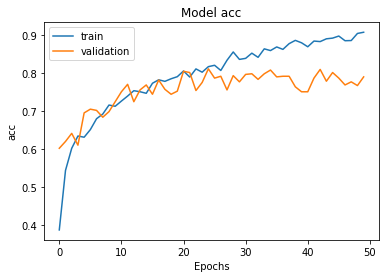

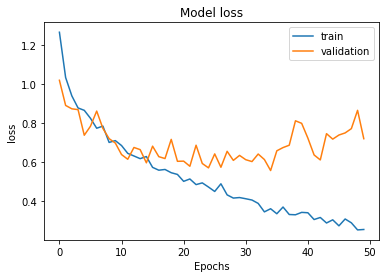

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.


C:\Users\User\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=50, steps_per_epoch=69, validation_data=<keras_pre..., validation_steps=20)`
  if sys.path[0] == '':


Epoch 1/50
69/69 [==============================] - 34s 490ms/step - loss: 1.2579 - acc: 0.3907 - val_loss: 1.0000 - val_acc: 0.5801
Epoch 2/50
69/69 [==============================] - 33s 472ms/step - loss: 1.0362 - acc: 0.5495 - val_loss: 0.9000 - val_acc: 0.6095
Epoch 3/50
69/69 [==============================] - 30s 442ms/step - loss: 0.9429 - acc: 0.6016 - val_loss: 0.9212 - val_acc: 0.6029
Epoch 4/50
69/69 [==============================] - 28s 402ms/step - loss: 0.9213 - acc: 0.6134 - val_loss: 0.8226 - val_acc: 0.6536
Epoch 5/50
69/69 [==============================] - 27s 386ms/step - loss: 0.8866 - acc: 0.6328 - val_loss: 0.8277 - val_acc: 0.6634
Epoch 6/50
69/69 [==============================] - 27s 394ms/step - loss: 0.8173 - acc: 0.6575 - val_loss: 0.7635 - val_acc: 0.6928
Epoch 7/50
69/69 [==============================] - 27s 388ms/step - loss: 0.7811 - acc: 0.6736 - val_loss: 0.7735 - val_acc: 0.6928
Epoch 8/50
69/69 [==============================] - 27s 391ms/step - 

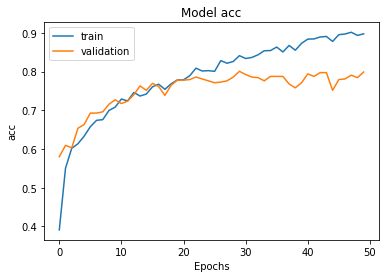

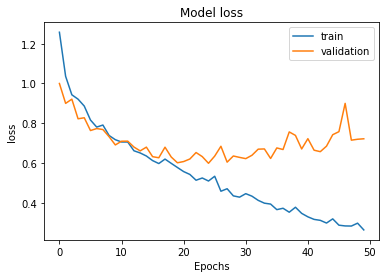

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.


C:\Users\User\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=50, steps_per_epoch=35, validation_data=<keras_pre..., validation_steps=10)`
  if sys.path[0] == '':


Epoch 1/50
35/35 [==============================] - 33s 951ms/step - loss: 1.3175 - acc: 0.3577 - val_loss: 1.1698 - val_acc: 0.4918
Epoch 2/50
35/35 [==============================] - 36s 1s/step - loss: 1.1518 - acc: 0.4779 - val_loss: 1.0542 - val_acc: 0.5686
Epoch 3/50
35/35 [==============================] - 37s 1s/step - loss: 1.0610 - acc: 0.5355 - val_loss: 0.9676 - val_acc: 0.5899
Epoch 4/50
35/35 [==============================] - 36s 1s/step - loss: 0.9733 - acc: 0.5793 - val_loss: 0.8504 - val_acc: 0.6422
Epoch 5/50
35/35 [==============================] - 36s 1s/step - loss: 0.9293 - acc: 0.5820 - val_loss: 0.8175 - val_acc: 0.6307
Epoch 6/50
35/35 [==============================] - 35s 1s/step - loss: 0.8882 - acc: 0.6306 - val_loss: 0.7885 - val_acc: 0.6667
Epoch 7/50
35/35 [==============================] - 33s 957ms/step - loss: 0.8749 - acc: 0.6172 - val_loss: 0.8702 - val_acc: 0.6422
Epoch 8/50
35/35 [==============================] - 34s 966ms/step - loss: 0.8338 - 

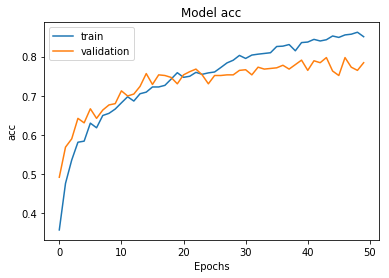

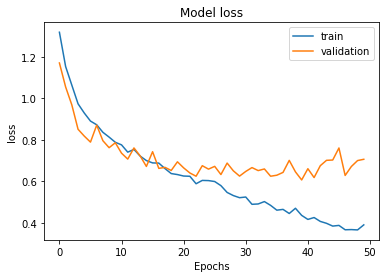

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 117s 851ms/step - loss: 1.2305 - acc: 0.4153 - val_loss: 0.9643 - val_acc: 0.6307
Epoch 2/50
138/138 [==============================] - 133s 962ms/step - loss: 0.9891 - acc: 0.5737 - val_loss: 0.8786 - val_acc: 0.6536
Epoch 3/50
138/138 [==============================] - 103s 744ms/step - loss: 0.8993 - acc: 0.6151 - val_loss: 0.7373 - val_acc: 0.7190
Epoch 4/50
138/138 [==============================] - 97s 702ms/step - loss: 0.8529 - acc: 0.6492 - val_loss: 0.8010 - val_acc: 0.7141
Epoch 5/50
138/138 [==============================] - 109s 791ms/step - loss: 0.7889 - acc: 0.6863 - val_loss: 0.7389 - val_acc: 0.7042
Epoch 6/50
138/138 [==============================] - 113s 821ms/step - loss: 0.7654 - acc: 0.6965 - val_loss: 0.7370 - val_acc: 0.7075
Epoch 7/50
138/138 [==============================] - 125s 90

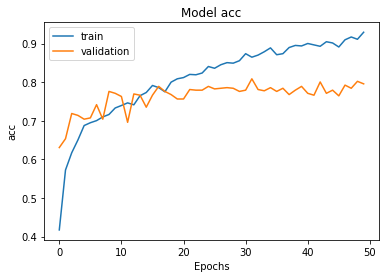

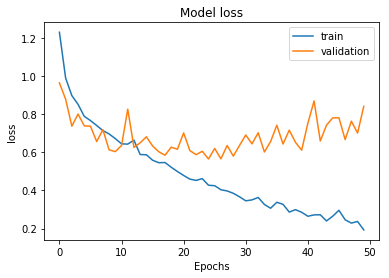

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 111s 2s/step - loss: 1.1658 - acc: 0.4586 - val_loss: 0.9228 - val_acc: 0.5801
Epoch 2/50
69/69 [==============================] - 2132s 31s/step - loss: 0.9682 - acc: 0.5939 - val_loss: 0.8535 - val_acc: 0.6487
Epoch 3/50
69/69 [==============================] - 111s 2s/step - loss: 0.8921 - acc: 0.6211 - val_loss: 0.8774 - val_acc: 0.6307
Epoch 4/50
69/69 [==============================] - 97s 1s/step - loss: 0.8914 - acc: 0.6369 - val_loss: 0.7877 - val_acc: 0.6961
Epoch 5/50
69/69 [==============================] - 101s 1s/step - loss: 0.8308 - acc: 0.6634 - val_loss: 0.7357 - val_acc: 0.7124
Epoch 6/50
69/69 [==============================] - 103s 1s/step - loss: 0.7949 - acc: 0.6888 - val_loss: 0.7329 - val_acc: 0.7190
Epoch 7/50
69/69 [==============================] - 105s 2s/step - loss: 0.7582 - acc: 0.

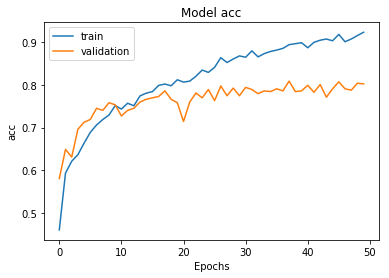

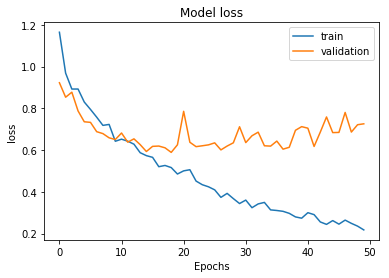

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 119s 3s/step - loss: 1.3507 - acc: 0.3117 - val_loss: 1.1360 - val_acc: 0.5278
Epoch 2/50
35/35 [==============================] - 117s 3s/step - loss: 1.1122 - acc: 0.5181 - val_loss: 0.8981 - val_acc: 0.6242
Epoch 3/50
35/35 [==============================] - 112s 3s/step - loss: 0.9882 - acc: 0.5878 - val_loss: 0.8468 - val_acc: 0.6650
Epoch 4/50
35/35 [==============================] - 110s 3s/step - loss: 0.9376 - acc: 0.6105 - val_loss: 0.8058 - val_acc: 0.6748
Epoch 5/50
35/35 [==============================] - 122s 3s/step - loss: 0.8844 - acc: 0.6298 - val_loss: 0.8009 - val_acc: 0.6944
Epoch 6/50
35/35 [==============================] - 113s 3s/step - loss: 0.8829 - acc: 0.6494 - val_loss: 0.7748 - val_acc: 0.7108
Epoch 7/50
35/35 [==============================] - 124s 4s/step - loss: 0.8122 - acc: 0.6

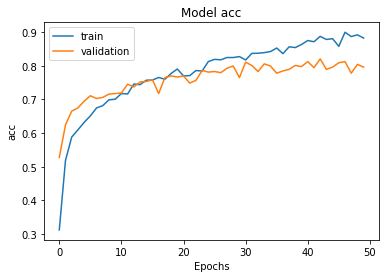

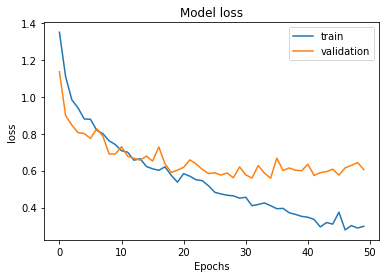

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 42s 301ms/step - loss: 1.2215 - acc: 0.4241 - val_loss: 1.0040 - val_acc: 0.5523
Epoch 2/50
138/138 [==============================] - 39s 285ms/step - loss: 1.0272 - acc: 0.5693 - val_loss: 0.9533 - val_acc: 0.5768
Epoch 3/50
138/138 [==============================] - 39s 286ms/step - loss: 0.9363 - acc: 0.5849 - val_loss: 0.8654 - val_acc: 0.6405
Epoch 4/50
138/138 [==============================] - 41s 294ms/step - loss: 0.8601 - acc: 0.6349 - val_loss: 0.7485 - val_acc: 0.6781
Epoch 5/50
138/138 [==============================] - 40s 288ms/step - loss: 0.8037 - acc: 0.6747 - val_loss: 0.7532 - val_acc: 0.6830
Epoch 6/50
138/138 [==============================] - 39s 285ms/step - loss: 0.7997 - acc: 0.6739 - val_loss: 0.7322 - val_acc: 0.7124
Epoch 7/50
138/138 [==============================] - 39s 285ms/st

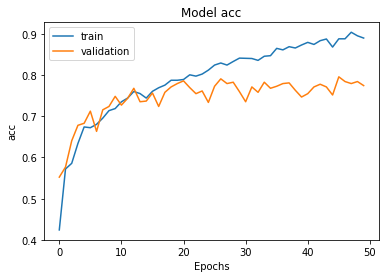

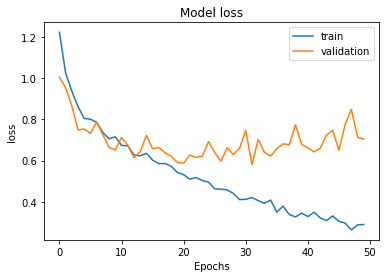

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 40s 574ms/step - loss: 1.2835 - acc: 0.3714 - val_loss: 1.0743 - val_acc: 0.5441
Epoch 2/50
69/69 [==============================] - 38s 554ms/step - loss: 1.1074 - acc: 0.5074 - val_loss: 0.9595 - val_acc: 0.5817
Epoch 3/50
69/69 [==============================] - 37s 534ms/step - loss: 0.9974 - acc: 0.5561 - val_loss: 0.8698 - val_acc: 0.6242
Epoch 4/50
69/69 [==============================] - 37s 533ms/step - loss: 0.9119 - acc: 0.5848 - val_loss: 0.8029 - val_acc: 0.6275
Epoch 5/50
69/69 [==============================] - 37s 543ms/step - loss: 0.8865 - acc: 0.6204 - val_loss: 0.8380 - val_acc: 0.6422
Epoch 6/50
69/69 [==============================] - 36s 528ms/step - loss: 0.8556 - acc: 0.6234 - val_loss: 0.7594 - val_acc: 0.6356
Epoch 7/50
69/69 [==============================] - 37s 535ms/step - loss: 0.8

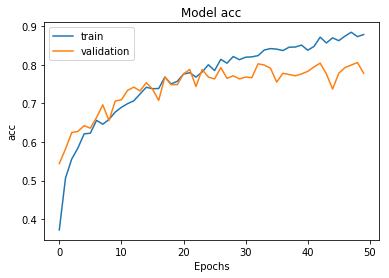

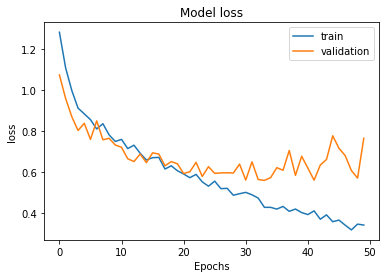

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 42s 1s/step - loss: 1.3252 - acc: 0.3394 - val_loss: 1.2114 - val_acc: 0.4935
Epoch 2/50
35/35 [==============================] - 39s 1s/step - loss: 1.1187 - acc: 0.5118 - val_loss: 0.9257 - val_acc: 0.5948
Epoch 3/50
35/35 [==============================] - 45s 1s/step - loss: 1.0250 - acc: 0.5663 - val_loss: 0.9118 - val_acc: 0.5964
Epoch 4/50
35/35 [==============================] - 48s 1s/step - loss: 0.9792 - acc: 0.5967 - val_loss: 0.8723 - val_acc: 0.6373
Epoch 5/50
35/35 [==============================] - 43s 1s/step - loss: 0.8790 - acc: 0.6302 - val_loss: 0.8147 - val_acc: 0.6307
Epoch 6/50
35/35 [==============================] - 40s 1s/step - loss: 0.8864 - acc: 0.6311 - val_loss: 0.8212 - val_acc: 0.6520
Epoch 7/50
35/35 [==============================] - 42s 1s/step - loss: 0.8573 - acc: 0.6369 - v

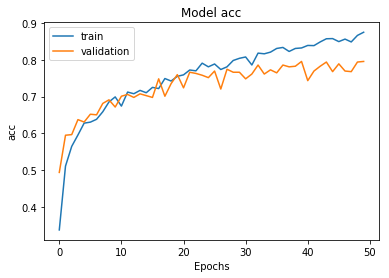

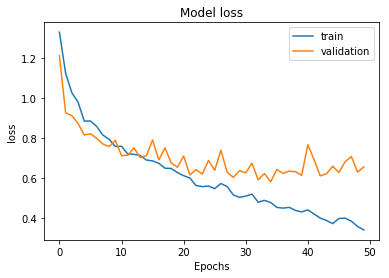

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 115s 832ms/step - loss: 1.2691 - acc: 0.3793 - val_loss: 0.9002 - val_acc: 0.5866
Epoch 2/50
138/138 [==============================] - 106s 768ms/step - loss: 0.9867 - acc: 0.5769 - val_loss: 0.8957 - val_acc: 0.6111
Epoch 3/50
138/138 [==============================] - 105s 761ms/step - loss: 0.9185 - acc: 0.6040 - val_loss: 0.8166 - val_acc: 0.6732
Epoch 4/50
138/138 [==============================] - 106s 768ms/step - loss: 0.8626 - acc: 0.6330 - val_loss: 0.8603 - val_acc: 0.6471
Epoch 5/50
138/138 [==============================] - 106s 766ms/step - loss: 0.8232 - acc: 0.6515 - val_loss: 0.7797 - val_acc: 0.6650
Epoch 6/50
138/138 [==============================] - 104s 756ms/step - loss: 0.7571 - acc: 0.6933 - val_loss: 0.7205 - val_acc: 0.7239
Epoch 7/50
138/138 [==============================] - 105s 7

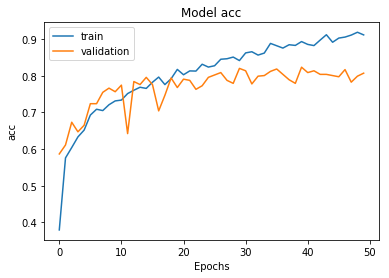

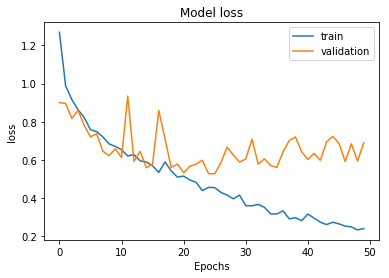

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 103s 1s/step - loss: 1.1686 - acc: 0.4872 - val_loss: 0.9426 - val_acc: 0.5637
Epoch 2/50
69/69 [==============================] - 103s 1s/step - loss: 1.0233 - acc: 0.5603 - val_loss: 0.8688 - val_acc: 0.6307
Epoch 3/50
69/69 [==============================] - 102s 1s/step - loss: 0.9017 - acc: 0.6061 - val_loss: 0.7739 - val_acc: 0.6503
Epoch 4/50
69/69 [==============================] - 102s 1s/step - loss: 0.8701 - acc: 0.6464 - val_loss: 0.7454 - val_acc: 0.7190
Epoch 5/50
69/69 [==============================] - 102s 1s/step - loss: 0.8164 - acc: 0.6659 - val_loss: 0.7052 - val_acc: 0.6977
Epoch 6/50
69/69 [==============================] - 101s 1s/step - loss: 0.7481 - acc: 0.6917 - val_loss: 0.6789 - val_acc: 0.7337
Epoch 7/50
69/69 [==============================] - 105s 2s/step - loss: 0.7474 - acc: 0.7

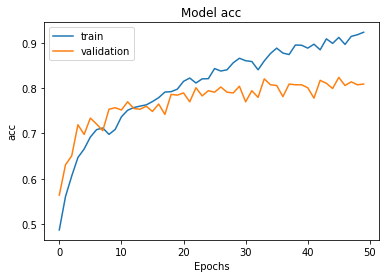

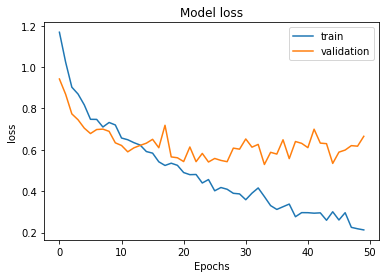

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 98s 3s/step - loss: 1.2734 - acc: 0.4020 - val_loss: 0.9851 - val_acc: 0.5539
Epoch 2/50
35/35 [==============================] - 93s 3s/step - loss: 1.0328 - acc: 0.5507 - val_loss: 0.8648 - val_acc: 0.6242
Epoch 3/50
35/35 [==============================] - 92s 3s/step - loss: 0.9279 - acc: 0.6083 - val_loss: 0.8048 - val_acc: 0.6503
Epoch 4/50
35/35 [==============================] - 93s 3s/step - loss: 0.8639 - acc: 0.6333 - val_loss: 0.7840 - val_acc: 0.6585
Epoch 5/50
35/35 [==============================] - 96s 3s/step - loss: 0.8503 - acc: 0.6391 - val_loss: 0.7637 - val_acc: 0.6585
Epoch 6/50
35/35 [==============================] - 94s 3s/step - loss: 0.7812 - acc: 0.6713 - val_loss: 0.7459 - val_acc: 0.6846
Epoch 7/50
35/35 [==============================] - 101s 3s/step - loss: 0.7632 - acc: 0.6954 - 

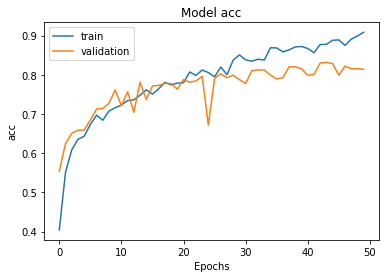

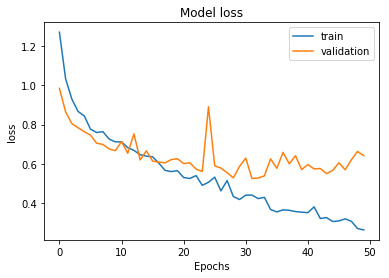

In [8]:
Results = []

for nb_layers in range(3,5):
    for img_size in [64,128]: 
        for batch_size in [16,32,64]:
            train_generator, validation_generator, test_generator = create_generators(img_size = img_size, batch_size = batch_size)
            model = create_model(32,nb_layers,img_size = img_size)
            History = model.fit_generator(train_generator,
                              steps_per_epoch = len(train_generator),
                              nb_epoch = 50,
                              validation_data = validation_generator,
                              validation_steps = len(validation_generator),
                             )
            print('\nNumber of layers: ' + str(nb_layers) + ' ImgSize: ' + str(img_size) + ' Batch size: ' + str(batch_size) + ' :')
            draw_graph(History, 'acc')
            draw_graph(History, 'loss')
            result = model.evaluate_generator(test_generator, len(test_generator))
            Results.append(result)